num_classes : 3
classe_names : ['charger', 'headphone', 'laptop']


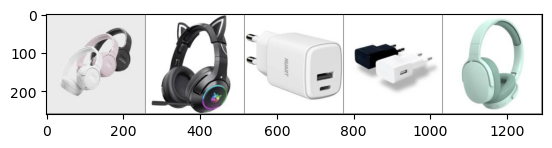

GroundTruth:  headphone headphone charger charger headphone
Device:  cpu
Predicted:  charger headphone charger laptop headphone
Accuracy of the network on the 30 test images: 80 %
Recall for class: charger is 70.0 %
Recall for class: headphone is 70.0 %
Recall for class: laptop is 100.0 %


In [4]:
import torch

import torchvision
import torchvision.transforms as transforms

import matplotlib.pyplot as plt
import numpy as np

from customdataset import CustomImageDataset
from electronic_model import Net

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

#########################################################################################################

transform = transforms.Compose(
    [transforms.ToTensor(),
        transforms.Resize((256, 256)),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

data_path = "./dataset_electronics"

batch_size=5

test_data_set = CustomImageDataset(data_set_path=f"{data_path}/test",
                                    transforms=transform)
testloader = torch.utils.data.DataLoader(test_data_set, batch_size=batch_size, shuffle=True)

num_classes = test_data_set.num_classes
classes = test_data_set.class_names

print("num_classes :", num_classes)
print("classe_names :", classes)
###########################################################################################

dataiter = iter(testloader)
images, labels = next(dataiter)

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print("Device: ", device)

#############################################################################################

PATH = './electronics_net.pth'
net = Net().to(device)
net.load_state_dict(torch.load(PATH))

outputs = net(images)

_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}' for j in range(batch_size)))

correct = 0
total = 0

# prepare to count predictions for each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# again no gradients needed
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        total += labels.size(0)
        correct += (predictions == labels).sum().item()

        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1

print(f'Accuracy of the network on the 30 test images: {100 * correct // total} %')

# print accuracy for each class
for classname, correct_count in correct_pred.items():
    recall = 100 * float(correct_count) / total_pred[classname]
    print(f'Recall for class: {classname:5s} is {recall:.1f} %')

del dataiter

#############################################################################################